In [73]:
import mysql.connector
import matplotlib.pyplot as plt

In [66]:
# Ustawienia połączenia
config = {
'user': 'new_user',
'password': 'new_password',
'host': 'localhost',
'database': 'MojaBazaDanych',
'port': 3306, # Domyślnie 3306, MySQL miniserver port 3311
'charset': 'utf8', # Jeżeli potrzebne, zmień na obsługiwany zestaw znaków
'raise_on_warnings': True
}
# Utworzenie połączenia
conn = mysql.connector.connect(**config)
# Utworzenie obiektu kursora
cursor = conn.cursor()
# Przykładowe zapytanie
cursor.execute("SELECT * FROM MojaTabela")
# Pobranie wyników

result = cursor.fetchall()
# Wyświetlenie wyników
for row in result:
    print(row)

In [67]:
# Utworzenie tabeli w bazie danych
create_table_query = """
CREATE TABLE Osoby (
id INT AUTO_INCREMENT PRIMARY KEY,
imie VARCHAR(50) NOT NULL,
nazwisko VARCHAR(50) NOT NULL,
wiek INT
)
"""
cursor.execute(create_table_query)
conn.commit()

In [68]:
# Dodawanie rekordu
insert_query = "INSERT INTO Osoby (imie, nazwisko, wiek) VALUES (%s, %s,%s)"
values = ("Jan", "Kowalski", 22)
cursor.execute(insert_query, values)
conn.commit()

In [69]:
# Aktualizacja rekordu
update_query = "UPDATE Osoby SET wiek = %s WHERE imie = %s"
new_age = 23
name_to_update = "Jan"
cursor.execute(update_query, (new_age, name_to_update))
conn.commit()

In [70]:
# Usuwanie rekordu
delete_query = "DELETE FROM Osoby WHERE nazwisko = %s"
surname_to_delete = "Kowalski"
cursor.execute(delete_query, (surname_to_delete,))
conn.commit()

24.

In [71]:
cursor.execute("""
    CREATE TABLE IF NOT EXISTS Produkty (
        id_produktu INT AUTO_INCREMENT PRIMARY KEY,
        nazwa_produktu VARCHAR(100) NOT NULL,
        cena DECIMAL(10, 2) NOT NULL
    )
    """)
conn.commit()

DatabaseError: 1050: Table 'Produkty' already exists

25.

In [75]:
cursor.executemany("""
    INSERT INTO Produkty (nazwa_produktu, cena) VALUES (%s, %s)
    """, [
        ("Koszulka", 19.99),
        ("Mango", 9.50),
        ("Żelazko", 105.25)
    ])
conn.commit()

26.

In [76]:
query = "SELECT * FROM Produkty WHERE cena > 50"
cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)

(12, 'Żelazko', Decimal('105.25'))


27.

In [77]:
update_query = "UPDATE Produkty SET cena = 15.99 WHERE nazwa_produktu = 'Produkt A'"
cursor.execute(update_query)
conn.commit()

28.

In [78]:
delete_query = "DELETE FROM Produkty WHERE nazwa_produktu = 'Produkt C'"
cursor.execute(delete_query)
conn.commit()

29.

In [79]:
cursor.execute("""
    CREATE TABLE IF NOT EXISTS Zamowienia (
        id_zamowienia INT AUTO_INCREMENT PRIMARY KEY,
        id_produktu INT,
        ilosc INT NOT NULL,
        FOREIGN KEY (id_produktu) REFERENCES Produkty(id_produktu)
    )
    """)
conn.commit()

DatabaseError: 1050: Table 'Zamowienia' already exists

30.

In [80]:
cursor.executemany("""
    INSERT INTO Zamowienia (id_produktu, ilosc) VALUES (%s, %s)
    """, [
        (1, 2),
        (2, 1)
    ])
conn.commit()

31.

In [81]:
join_query = """
    SELECT Zamowienia.id_zamowienia, Produkty.nazwa_produktu, Zamowienia.ilosc
    FROM Zamowienia
    JOIN Produkty ON Zamowienia.id_produktu = Produkty.id_produktu
    """
cursor.execute(join_query)
results = cursor.fetchall()
print("Zamówienia z informacjami o produktach:")
for row in results:
    print(row)

Zamówienia z informacjami o produktach:
(1, 'Produkt A', 2)
(2, 'Produkt B', 1)
(3, 'Produkt A', 2)
(4, 'Produkt B', 1)


32.

In [86]:
def suma_wartosci_zamowien(id_produktu):
    query = """
    SELECT SUM(Produkty.cena * Zamowienia.ilosc)
    FROM Zamowienia
    JOIN Produkty ON Zamowienia.id_produktu = Produkty.id_produktu
    WHERE Produkty.id_produktu = %s
    """
    cursor.execute(query, (id_produktu,))
    result = cursor.fetchone()
    return result[0] if result else 0

print(f"Suma wartości zamówień dla produktu o ID 1: {suma_wartosci_zamowien(1)} zł")


Suma wartości zamówień dla produktu o ID 1: 63.96 zł


33.

In [83]:
raport_query = """
    SELECT Produkty.nazwa_produktu, SUM(Produkty.cena * Zamowienia.ilosc) AS laczna_wartosc
    FROM Zamowienia
    JOIN Produkty ON Zamowienia.id_produktu = Produkty.id_produktu
    GROUP BY Produkty.nazwa_produktu
    """
cursor.execute(raport_query)
results = cursor.fetchall()
print("Raport łącznej wartości zamówień dla każdego produktu:")
for row in results:
    print(f"Produkt: {row[0]}, Łączna wartość zamówień: {row[1]} zł")

Raport łącznej wartości zamówień dla każdego produktu:
Produkt: Produkt A, Łączna wartość zamówień: 63.96 zł
Produkt: Produkt B, Łączna wartość zamówień: 99.00 zł


Produkt: Produkt A, Łączna wartość zamówień: 63.96 zł
Produkt: Produkt B, Łączna wartość zamówień: 99.00 zł


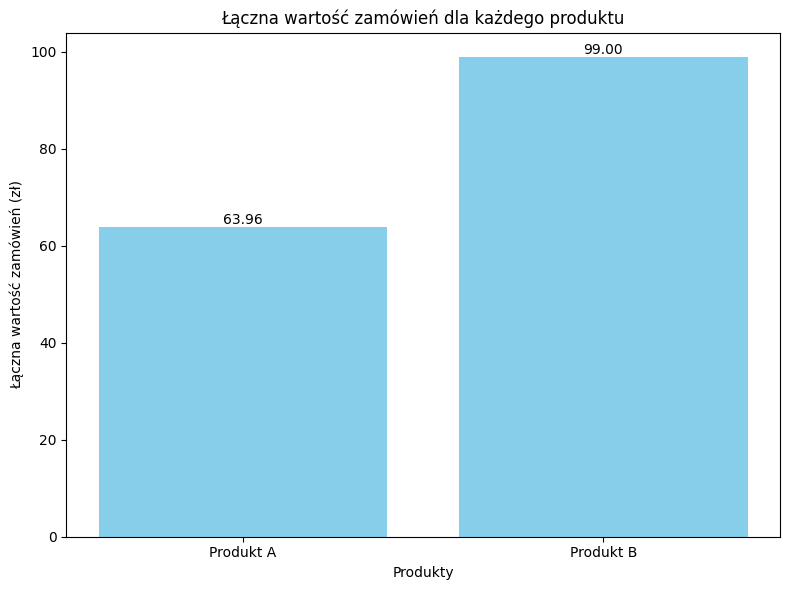

In [87]:
produkty = []
wartosci = []
for row in results:
    print(f"Produkt: {row[0]}, Łączna wartość zamówień: {row[1]} zł")
    produkty.append(row[0])
    wartosci.append(row[1])

plt.figure(figsize=(8, 6))
bars = plt.bar(produkty, wartosci, color='skyblue')
plt.xlabel('Produkty')
plt.ylabel('Łączna wartość zamówień (zł)')
plt.title('Łączna wartość zamówień dla każdego produktu')

# Dodanie wartości na słupkach
for bar, wartosc in zip(bars, wartosci):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{wartosc:.2f}', 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [58]:
if conn.is_connected():
        cursor.close()
        conn.close()